# Project 7: Statistical Analysis and Hypothesis Testing

# Bhavik Jain

# Submitted to AINE AI

## Problem

The overall objective of the project is to test the company’s CEO’s hypothesis that moving the first gate from level 30 to level 40 increases retention rate and the number of game rounds played. The CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait before they can proceed further in the game.

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter setting
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)


In [3]:
#Read data using pandas
user_df = pd.read_csv("C:/Users/Bhavik Jain/Downloads/cookie_cats.csv")


In [4]:
#check data types of each column using "dtypes" funtion
print("Data types for the data set:")
user_df.dtypes

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

bool = True or False

In [5]:
#check dimesion of data i.e. # of rows and column using pandas "shape" funtion 
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

Shape of the data i.e. no. of rows and columns


(90189, 5)

In [6]:
#display first 5 rows of the data using "head" function
print("first 5 rows of the raw data:")
user_df.head(5)

first 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [7]:
# check for any missing values in the data using isnull() function
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [8]:
# to check if there is any duplicate user_id present in the data
user_df.userid.nunique()/user_df.shape[0]

1.0

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

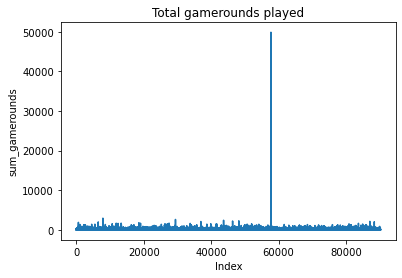

In [9]:
#check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

We have to remove the above outlier because it will alter our all calculation

In [10]:
# removing the outliers
print("max value of sum_gamerounds")
max_value = max(user_df.sum_gamerounds)
max_value
print("index of the max value")
index_value = user_df[user_df.sum_gamerounds.isin([max_value])].index.tolist()
index_value

# remove the row by index
user_df.drop(user_df.index[index_value],inplace=True)

max value of sum_gamerounds


49854

index of the max value


[57702]

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

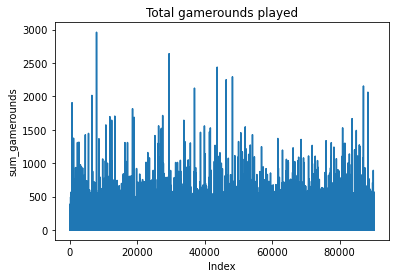

In [11]:
#plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [12]:
#Insert calculation for 7-days retention rate
retention_rate_7=round((user_df.retention_7.sum()/user_df.shape[0])*100,2)
print("Overall 7 days retention rate of the game for both versions is: ", retention_rate_7,"%")

Overall 7 days retention rate of the game for both versions is:  18.61 %


In [13]:
user_df[user_df.sum_gamerounds == 0].shape[0]

3994

above is the total count of person, those who have downloaded the game but never played it.

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'count of players')

Text(0.5, 1.0, 'count of playes Vs sum_gamerounds')

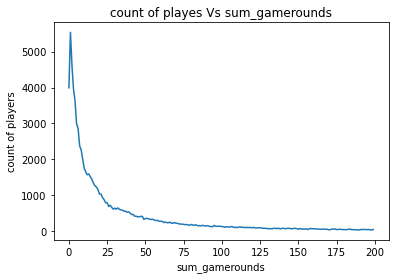

In [14]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds 
#Use plot() function on the summarized stats to visualize the chart

new_data=user_df[["userid","sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns={"userid":"count"})[0:200]
plt.xlabel("sum_gamerounds")
plt.ylabel("count of players")
plt.title("count of playes Vs sum_gamerounds")
plt.plot(new_data["sum_gamerounds"],new_data["count"])

Above graph showing that as the gamerounds increases count of players decreases

In [15]:
#Create cross tab for game version and retention_7 flag counting numberr of users for each possible categories
pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r:r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


Above calculation shows that the retention rate at gate_30 is good as compare to gate_40 so we can say that we have to keep the gate_30.

In [16]:
#use pandas group by to calculate average game rounds played summarized by different version
user_df[["version","sum_gamerounds"]].groupby("version").agg("mean")

,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


In [17]:
user_df[(user_df.retention_7 == True) & (user_df.version == "gate_40")].sum_gamerounds.mean()

165.6498369368281

In [18]:
#Defined A/B for hypthesis testing
#user_df["version"] = np.where(user_df.version == "gate_30","A","B")
user_df["version"]=user_df["version"].replace(["gate_30","gate_40"],["A","B"])
group_A = pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

In [19]:
#null hypothesisH0: distribution is normal
#Alternative Hypothesis H1: distribution is not normal

#test for group_A
shapiro(group_A)

#test for group_B
shapiro(group_B)

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)

In [20]:
#Leven's Test
#Null Hypothesis H0: two groups have equal variances
#Alternate Hypothesis H1: Two groups do not have equal variance

#perform leven's test and accept or reject the null hypothesis basedon the results
stats.levene(group_A.sum_gamerounds, group_B.sum_gamerounds)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

In [21]:
# two sample test
#Null hypothesis H0: two samples are equal
#Alternate Hypothesis H1: two samples are different

#Apply relevant two sample test to accept or reject the null hypothesis
stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds)

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

In [22]:
#two samples test
#Null Hypothesis H0:two samples are equal
#Alternative Hypothesis H1: the first sample is greater than the second sample

#Apply relevant two saple test to accept or reject the null hypothesis
stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds, alternative="greater")

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

we are going to keep at gate_30 because from the above two hypothesis testing we can see that first sample is larger than the second one. we also know that the both samples have the same variance and the distribution is not normal.

<AxesSubplot:title={'center':'retention_1'}, ylabel='Density'>

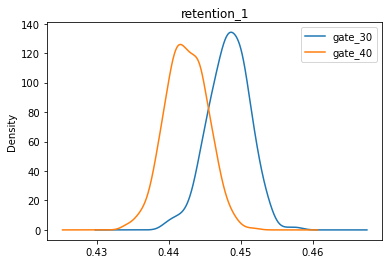

<AxesSubplot:title={'center':'retentioin_7'}, ylabel='Density'>

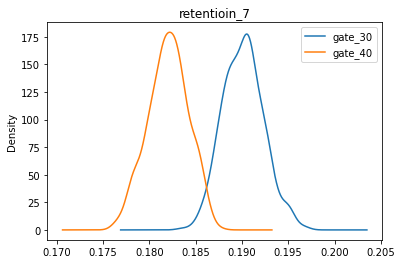

In [24]:
list_1d = []
list_2d = []
for i in range(500):
    boot_mean1 = user_df.sample(frac=0.7, replace =True).groupby('version')['retention_1'].mean()
    list_1d.append(boot_mean1.values)
    
    boot_mean2 = user_df.sample(frac=0.7, replace =True).groupby('version')['retention_7'].mean()
    list_2d.append(boot_mean2.values)

#Transforming the list to a DataFrame
list_1d=pd.DataFrame(list_1d, columns=['gate_30','gate_40'])
list_2d = pd.DataFrame(list_2d,columns=['gate_30','gate_40'])

list_1d.plot(kind="kde",title="retention_1")
plt.show()
list_2d.plot(kind="kde",title="retentioin_7")
plt.show()

From the above graph we can see that retention 1 for gate_30 is higher than gate_40. So we can refer to CEO to keep the gate at 30 rather than keepping it at 40